# **CosmiCode-Internship**

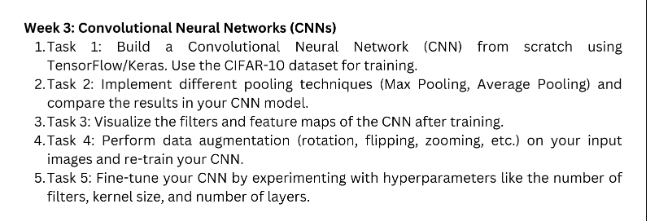

CNNs are specifically useful for processing and interpreting images. They are able to capture spatial details, basically, it doesn't treat pixels on there own.
<br/>
**Spatial what bro?** In image processing, spatial relationships (like nearby pixels) are crucial. For example, to recognize a dog, it helps to know where its eyes, ears, and nose are relative to each other. A regular fully connected (dense) network treats each pixel as independent, so it struggles to "understand" these spatial patterns.
<br/>
**Filters:** they use small filters that focus on small parts of the image instead of just one pixel. By stacking many layers, they gradually detect more complex patterns (like shapes or textures) in deeper layers. This is what I meant by "hierarchical" — each layer builds on the patterns detected in the previous one, going from simple shapes to whole objects.
<br/>
**More on Filters:** A filter is a small grid, like a 3x3 or 5x5 array, that slides (or “convolves”) over the image.
This grid contains numbers, called "weights," that the model learns. It’s not matrix multiplication but element-wise multiplication:
<br/>
The filter overlays a 3x3 part of the image.
<br/>
Each cell in the filter multiplies by the corresponding pixel.
<br/>
You add up the results to get a single number.
<br/>
**Stride and Padding:** stride is the amount of pixels by which the filter grid moves, and padding is basically of two types:
<br/>
**Valid Padding:** No extra pixels are added around the edges, so the feature map becomes smaller.
<br/>
**Same Padding:** Extra pixels are added around the edges to keep the feature map size the same as the input image.
<br/>
Use **padding='same'** or padding='valid' in Conv2D.
<br/>
after all that, we have the convolutional layer done, next we have pooling layer, that is of two types as well, max and avg. We normally use max pooling
<br/>
A Pooling Layer reduces the size of the feature maps, which lowers computation, speeds up training, and makes features easier to detect regardless of their exact location.<br/>
feature map is like the result of the filters btw.<br/>
**Do we need pooling layers after each Conv2D:** No, you don’t have to add a pooling layer after every convolutional layer, but it’s common to use it after one or two to keep the model efficient and to gradually reduce the feature map size.
<br/><br/>
btw, don't assume that more layers equal better results, tons of layers might lead to overfitting, it doesn't always lead to better results<br/>

after the conv layers, we will again be using dense layers, and CNNs could handle 2D data so it was fine so far but now, since we are moving to dense layers, we will use a flatten layer to convert the 2D output from the conv layer to 1D.<br/>
after flattening, we have the dense layers, Dense layers learn to classify based on the features extracted by the convolutional layers.<br/>
These layers combine all the patterns detected so far, making sense of them for the final output.<br/>
You could skip additional dense layers and connect directly to the output layer after flattening, but dense layers improve the model’s ability to combine features and make better predictions.
<br/>the CNN layers are good at finding patterns, but they aren't good at combining those patterns into a final decision. we can think of it as follows:<br/>
The convolutional layers are like specialist workers detecting patterns in specific areas (e.g., edges, shapes).<br/>
The dense layer is like a manager who combines all the findings from these workers to decide on the final classification.<br/>
and then finally, we have the usual output layer



btw, above I mentioned that filters have weights, and normally, like in linear regression, we just use gradient descent to find the best weights, so that begs the question. 
How do we do it in filters??<br/>
CNNs typically use backpropagation combined with gradient descent (or an optimized version like Adam) to adjust the filter weights. Here’s how it works:

After each forward pass, the model calculates the error (how different the predicted output is from the actual label).
The error is used to update the weights of all layers, including the filters in the convolutional layers.
Through backpropagation, the network "learns" which patterns in the image are most useful for making accurate predictions.


In [41]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define the model architecture
input_layer = layers.Input(shape=(32, 32, 3))
model = models.Sequential([
    input_layer,
    layers.Conv2D(32, (3, 3), activation='relu'),   # 32 filters, 3x3 kernel, padding and stride are default 
    layers.MaxPooling2D((2, 2)),    # 2x2 max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),   # Flatten the output of the last convolutional layer so we can use it as input for the dense layers
    layers.Dense(64, activation='relu'),    # 64 neurons, relu activation
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile and train the model with Max Pooling (using max pooling here btw, so don't need an extra block for task 2)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_max_pooling = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3410 - loss: 1.7893 - val_accuracy: 0.5276 - val_loss: 1.3114
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5587 - loss: 1.2436 - val_accuracy: 0.6085 - val_loss: 1.1205
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6335 - loss: 1.0432 - val_accuracy: 0.6029 - val_loss: 1.1324
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6681 - loss: 0.9498 - val_accuracy: 0.6604 - val_loss: 0.9746
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6976 - loss: 0.8608 - val_accuracy: 0.6832 - val_loss: 0.9079
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7110 - loss: 0.8223 - val_accuracy: 0.6914 - val_loss: 0.8945
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7327 - loss: 0.7601 - val_accuracy: 0.6965 - val_loss: 0.8884
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7465 -

## Task-2: Implement different pooling techniques (Max Pooling, Average Pooling) and compare the results in your CNN model.

In [42]:
# max pooling model is done above, lets do avg pooling

model_avg_pooling = models.Sequential([
    input_layer,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model with Average Pooling
model_avg_pooling.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_avg_pooling = model_avg_pooling.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3294 - loss: 1.8052 - val_accuracy: 0.5050 - val_loss: 1.3503
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5434 - loss: 1.2818 - val_accuracy: 0.5612 - val_loss: 1.2192
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6059 - loss: 1.1058 - val_accuracy: 0.6127 - val_loss: 1.0954
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6485 - loss: 0.9931 - val_accuracy: 0.6433 - val_loss: 1.0047
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6836 - loss: 0.9060 - val_accuracy: 0.6644 - val_loss: 0.9562
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7043 - loss: 0.8419 - val_accuracy: 0.6517 - val_loss: 1.0089
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7231 - loss: 0.7868 - val_accuracy: 0.6872 - val_loss: 0.9224
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7406 -

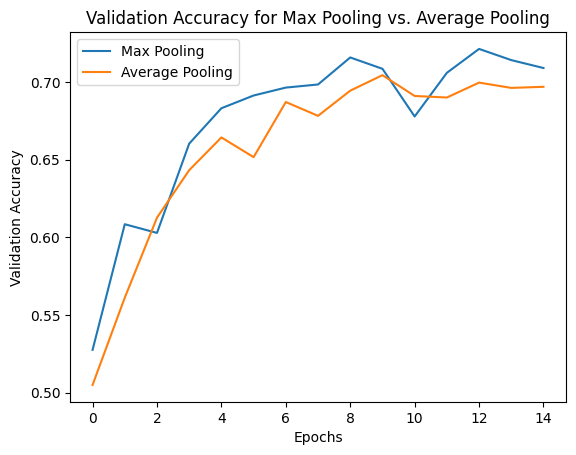

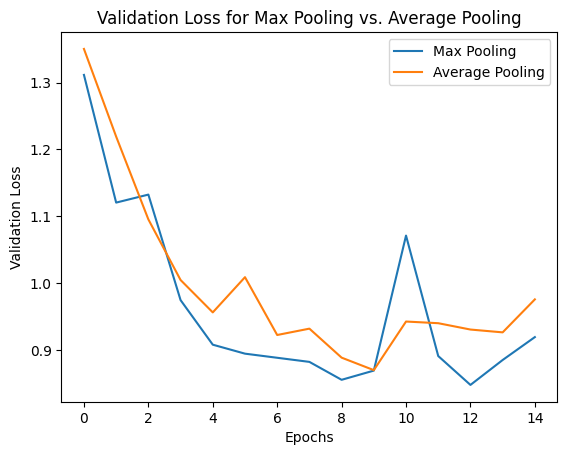

In [43]:
# now lets compare the max pooling model against the avg pooling model
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history_max_pooling.history['val_accuracy'], label='Max Pooling')
plt.plot(history_avg_pooling.history['val_accuracy'], label='Average Pooling')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy for Max Pooling vs. Average Pooling')
plt.show()

# Plotting loss
plt.plot(history_max_pooling.history['val_loss'], label='Max Pooling')
plt.plot(history_avg_pooling.history['val_loss'], label='Average Pooling')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss for Max Pooling vs. Average Pooling')
plt.show()


## Task 3: Visualize the filters and feature maps of the CNN after training.

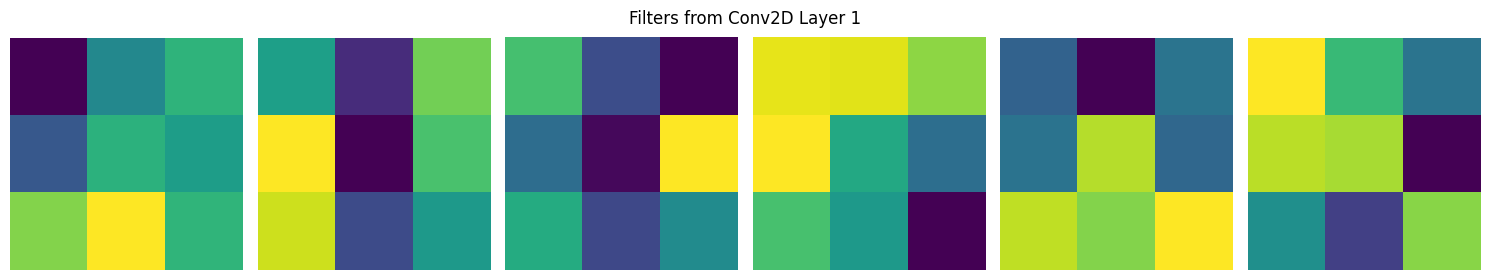

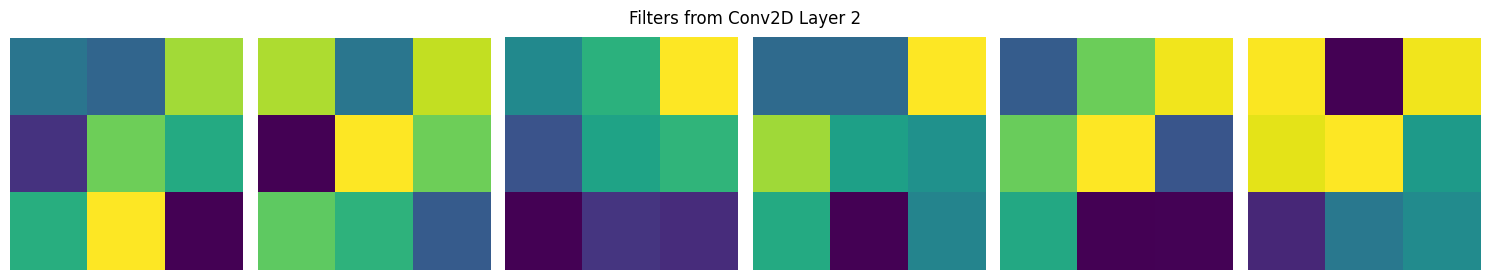

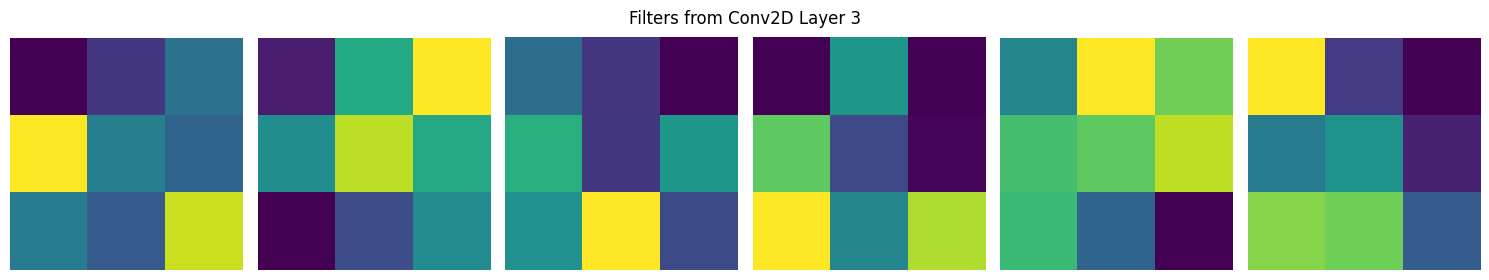

In [44]:
# # visualizing the filters first
for layer_idx, layer_name in enumerate(["Conv2D Layer 1", "Conv2D Layer 2", "Conv2D Layer 3"]):
    filters, biases = model.layers[layer_idx * 2].get_weights()  # Layers are at index 0, 2, and 4
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)  # Normalizing
    
    n_filters = 6
    fig, axs = plt.subplots(1, n_filters, figsize=(15, 3))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        axs[i].imshow(f[:, :, 0], cmap='viridis')
        axs[i].axis('off')
    fig.tight_layout()
    plt.suptitle(f'Filters from {layer_name}')
    plt.show()




Filter Values: Each color represents a different weight value. Bright colors (like yellow) represent higher weights, while dark colors (like purple) represent lower weights. These weights are what the model uses to "scan" the image and highlight certain patterns.<br/>

Learning Patterns: At this stage, the filters are mostly simple patterns because it’s the first layer. These filters typically learn to detect basic features like edges, corners, and simple textures. This is because the first layer filters interact directly with raw pixel values, so they capture low-level information.<br/>

Purpose of Filters: Each filter is looking for a specific pattern in the image. When you pass an image through this layer, each filter will highlight areas in the image where it detects that pattern. For example, one filter might detect vertical edges, while another detects horizontal edges.<br/>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


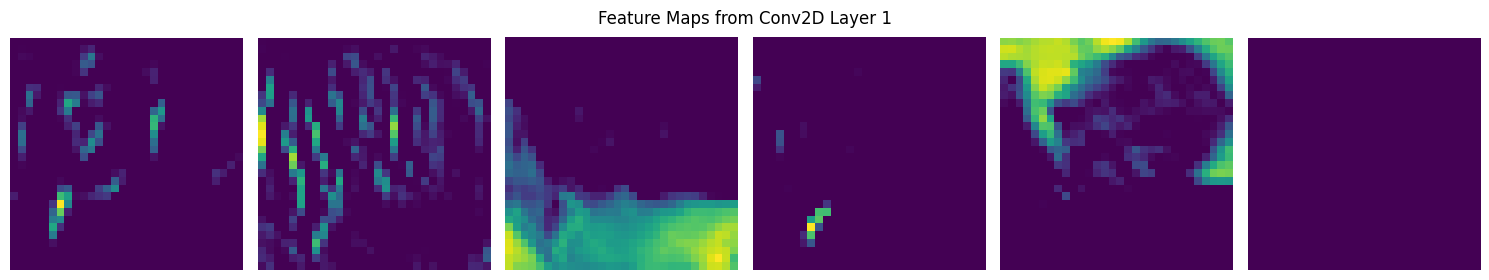

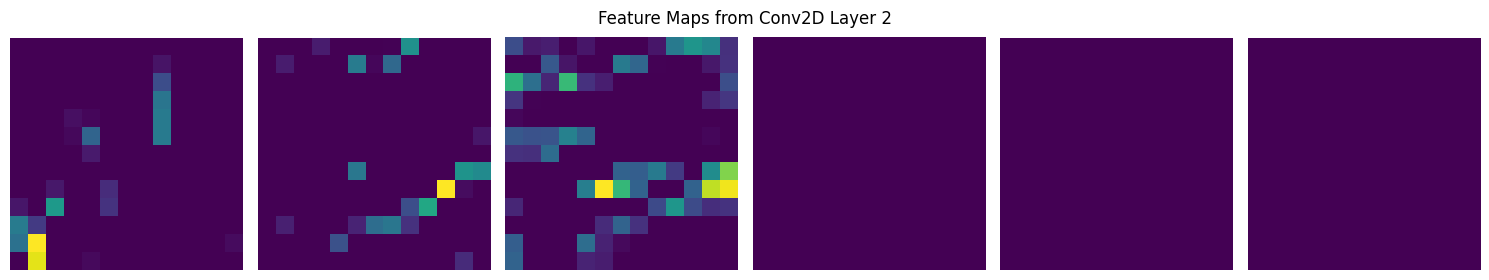

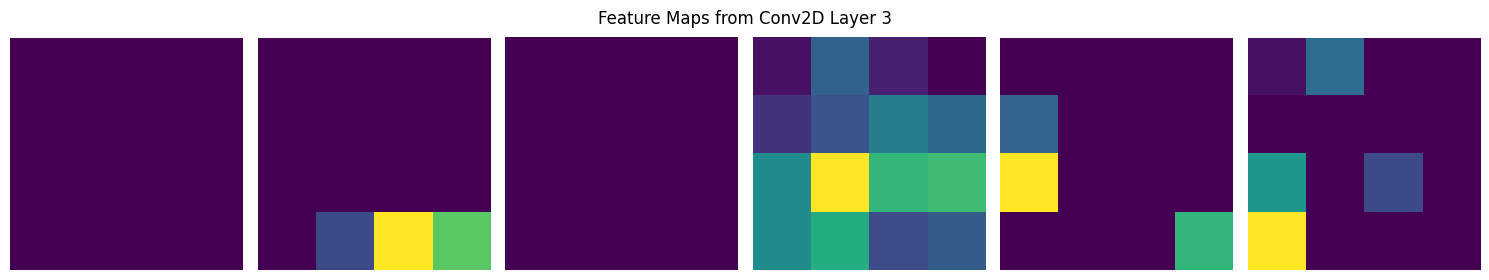

In [45]:

# lets visualize the feature map now
from tensorflow.keras.models import Model

# Choose an input image (e.g., the first image in the test set)
img = x_test[0:1]

# Create a model that outputs feature maps after each Conv2D layer
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
activation_model = Model(inputs=model.layers[0].input, outputs=conv_layer_outputs)  # Use model.layers[0].input

# Get feature maps
activations = activation_model.predict(img)

# Plot feature maps for each Conv2D layer with reduced size
layer_names = ["Conv2D Layer 1", "Conv2D Layer 2", "Conv2D Layer 3"]
for layer_index, layer_activation in enumerate(activations):
    n_features = layer_activation.shape[-1]
    
    fig, axs = plt.subplots(1, 6, figsize=(15, 3))  # Smaller size and tighter layout
    for i in range(6):  # Display first 6 feature maps
        axs[i].imshow(layer_activation[0, :, :, i], cmap='viridis')
        axs[i].axis('off')
    fig.tight_layout()  # Removes extra white space
    plt.suptitle(f'Feature Maps from {layer_names[layer_index]}')
    plt.show()



## Task 4: Perform data augmentation (rotation, flipping, zooming, etc.) on your input images and re-train your CNN.

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Shift images horizontally up to 10% of the width
    height_shift_range=0.1, # Shift images vertically up to 10% of the height
    shear_range=0.1,        # Shear transformation
    zoom_range=0.1,         # Zoom in or out up to 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels after transformations
)

# Fit the generator to the training data
datagen.fit(x_train)




input_layer = layers.Input(shape=(32, 32, 3))
model_augmented = models.Sequential([
    input_layer,
    layers.Conv2D(32, (3, 3), activation='relu'),   # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train the model with augmented data
batch_size = 64
history_augmented = model_augmented.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=15,
    validation_data=(x_test, y_test)
)




Epoch 1/15


c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.2882 - loss: 1.9023 - val_accuracy: 0.4646 - val_loss: 1.5018
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4900 - loss: 1.4311 - val_accuracy: 0.5707 - val_loss: 1.1935
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5421 - loss: 1.2804 - val_accuracy: 0.5975 - val_loss: 1.1269
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5752 - loss: 1.2000 - val_accuracy: 0.6037 - val_loss: 1.1496
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5968 - loss: 1.1458 - val_accuracy: 0.6530 - val_loss: 0.9840
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6108 - loss: 1.0991 - val_accuracy: 0.6438 - val_loss: 1.0011
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.6246 - loss: 1.0591 - val_accuracy: 0.6516 - val_loss: 0.9974
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6415 - loss: 1.0156 - val_accurac

KeyboardInterrupt: 

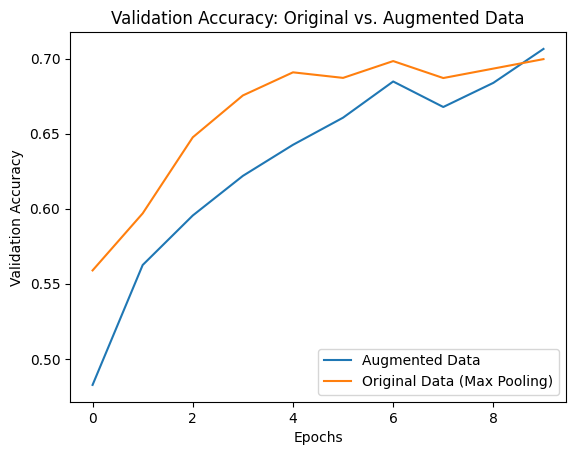

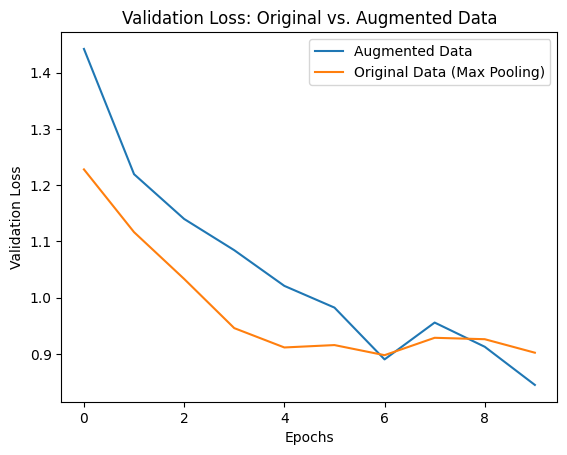

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Data')
plt.plot(history_max_pooling.history['val_accuracy'], label='Original Data (Max Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy: Original vs. Augmented Data')
plt.show()

# Plotting loss
plt.plot(history_augmented.history['val_loss'], label='Augmented Data')
plt.plot(history_max_pooling.history['val_loss'], label='Original Data (Max Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss: Original vs. Augmented Data')
plt.show()


## Task-5: Fine-tuning the CNN using hyperparameters

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from kerastuner import Hyperband
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

def build_model(hp):
    model = models.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(32, 32, 3)))
    
    # Tune the number of convolutional layers (1-3 layers)
    for i in range(hp.Int("conv_layers", 1, 3)):
        # Tune the number of filters per Conv layer
        filters = hp.Int(f"filters_{i}", min_value=32, max_value=128, step=32)
        # Tune the kernel size
        kernel_size = hp.Choice(f"kernel_size_{i}", values=[3, 5])
        
        model.add(layers.Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation="relu"))
        
        # Add pooling layer after each convolutional layer
        model.add(layers.MaxPooling2D((2, 2)))
        
    # Flatten layer
    model.add(layers.Flatten())
    
    # Tune the number of units in the dense layer
    dense_units = hp.Int("dense_units", min_value=32, max_value=128, step=32)
    model.add(layers.Dense(dense_units, activation="relu"))
    
    # Output layer
    model.add(layers.Dense(10, activation="softmax"))

    # Compile the model
    learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model


from kerastuner.tuners import Hyperband

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    directory="hyperparameter_tuning",
    project_name="cifar10_cnn"
)

# Perform hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Number of Conv Layers: {best_hps.get('conv_layers')}")
for i in range(best_hps.get('conv_layers')):
    print(f"Conv Layer {i+1} - Filters: {best_hps.get(f'filters_{i}')}, Kernel Size: {best_hps.get(f'kernel_size_{i}')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Rebuild and train the best model
best_model = tuner.hypermodel.build(best_hps)
history_best_model = best_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


In [ ]:
# Plot the best model's accuracy and loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_best_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_best_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Best Model Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history_best_model.history['loss'], label='Training Loss')
plt.plot(history_best_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Best Model Training and Validation Loss')
plt.show()
